### Project on Image Classification Using KMeans Clustering

KMeans is an unsupervised Machine Learning algorithm, comes under non-hierarchical clustering. In this type of clustering, we group or cluster the data points into the specified number of clusters. In this project, the data set is a set of images which are used to train a cluster model and after that we group the images.

#### Importing Required Packages for this Image Clustering project

In [2]:
# pip installing the OpenCv libary for cv2 module
!pip install opencv-python-headless

  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/20/44/458a0a135866f5e08266566b32ad9a182a7a059a894effe6c41a9c841ff1/opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.5 MB 919.0 kB/s eta 0:00:42
   ---------------------------------------- 0.2/38.5 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.5/38.5 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.7/38.5 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.2/38.5 MB 4.5 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.5 MB 4.6 MB/s eta 0:00:09
   -- ------------------------------------- 1.9/38.5 MB 5.4 MB/s eta 0:00:07
   -- ------------------------------------- 2.0/38.5 MB 4.8 MB/s eta 0:00:08
   

In [4]:
# Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#### Define a function called get_im for extracting the Images

In [5]:
def get_im(path): # Takes the path as a parameter
    im = cv2.imread(path) # Reads the image that lies in the path
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # Converting Images into Gray Scale Images
    im = cv2.resize(im, (90,135), cv2.INTER_LINEAR)
    i = im[0:100,:] # Selecting specific parts, logo only no text; first 100 pixels
    return i

#### Empty List Creation and Instanciate them to make them populate with images

In [6]:
# Craeting Empty Lists
labels = []
images = []

# Populate these list with images
for i in ['1', '2', '3', '4']:
    for p in enumerate(os.listdir(os.getcwd() + "\\" + i)):
        images.append(get_im(os.getcwd() + '\\' + i + '\\' + p[1]))
        labels.append(i)

#### Getting the Training Set for the Images

Note that this is unsuopervised learning, so no train-test-split is required. The whole Image set is used as training images set

In [7]:
# The training set is read as X_train and converted to an array
X_train = np.array(images)
X_train.shape # Checking the Shape of the Images

# Interpretation:
# The X_train array is a 3D tensor
# Can be read as a (100*90) matrix repeated 380 times in Plain English
# 380 Images, each 100 pixel long and 90 pixel wide

(380, 100, 90)

#### Show An Image and observe how it is looked

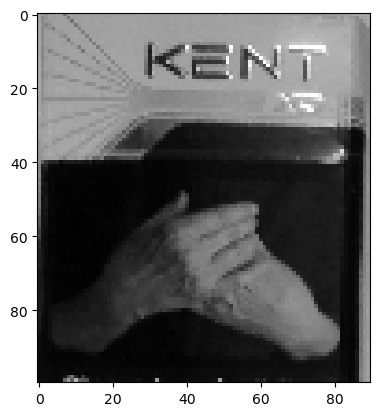

In [8]:
plt.imshow(X_train[100,:], cmap = "gray") # Last Image 

#### Flattening the Images
In this X_train object, it is a tensor. It can't be used for the KMeans Algorithm. So, flattening the Images are required. In this process we reshape the X_train tensor in a 2D matrix like structure, having shape (380*9000)

In [9]:
flat_img = X_train.flatten().reshape(380,9000)
print('Shape of Flatten Images:', flat_img.shape)

Shape of Flatten Images: (380, 9000)


#### Scaling the Data set Using the MinMaxScaler() function

In [10]:
scaler = MinMaxScaler()
scaled_img = scaler.fit_transform(flat_img)

#### Building the KMeans Model with the scaled_img data set and train the model

* Here I use 4 clusters as I know that there are 4 different types of Cigarette packets

In [11]:
model = KMeans(init = 'k-means++', n_clusters = 4, n_init = 10)
np.random.seed(100)
model.fit(scaled_img)

C:\PythonProgramming\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, n_init=10)

#### Checking the Lables attribute of the model.
* It shows that which row bwlongs to which cluster

In [13]:
labels = model.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

#### Creating a data frame to tabulate the findings that I get from the previous rows

* This helps to understand which image belongs to which cluster. 
* Note that there are 380 Images

In [18]:
img_report = {'Cluster':labels,'Id':range(0,380)}
img_report = pd.DataFrame(img_report)
img_report.head(20)

,Cluster,Id
0,2,0
1,2,1
2,2,2
3,2,3
4,2,4
5,2,5
6,2,6
7,2,7
8,2,8
9,2,9


#### Getting the Images that belong to the first Cluster
* Note that the first cluster has cluster index 0
* There are 4 clusters - 0,1,2,3

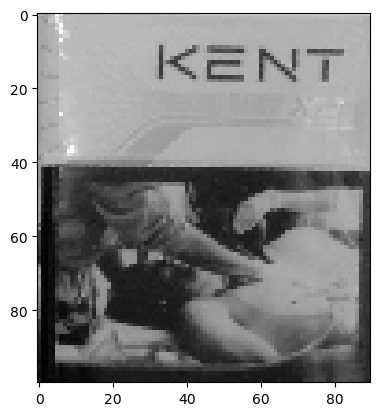

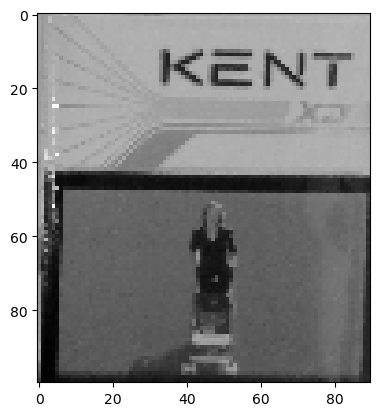

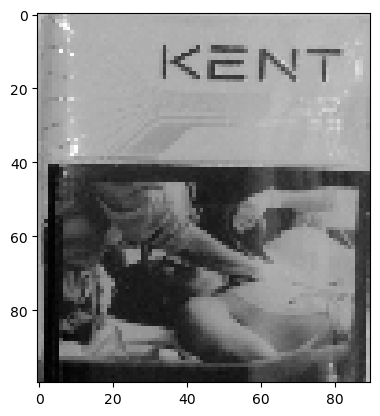

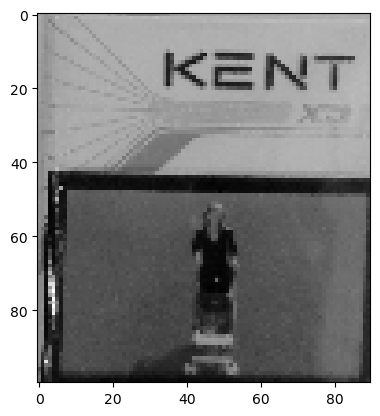

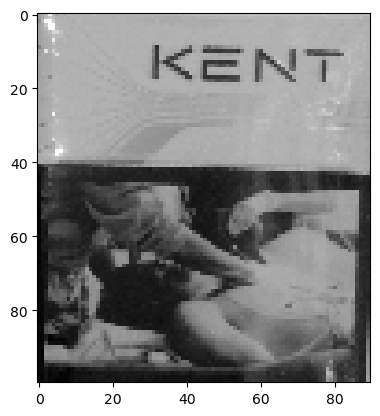

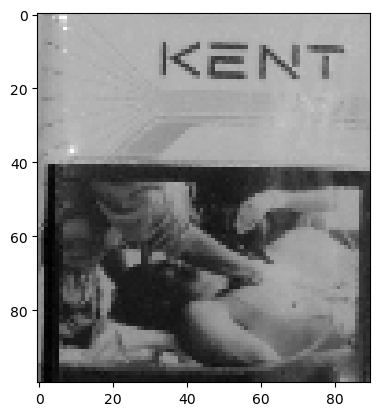

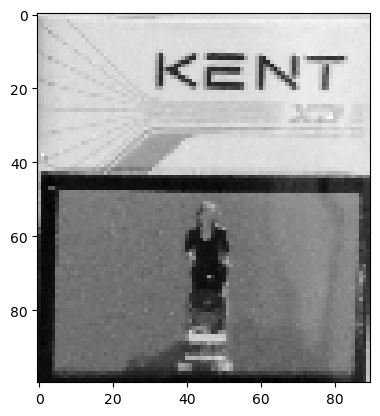

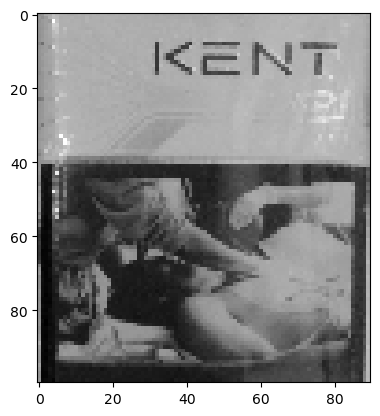

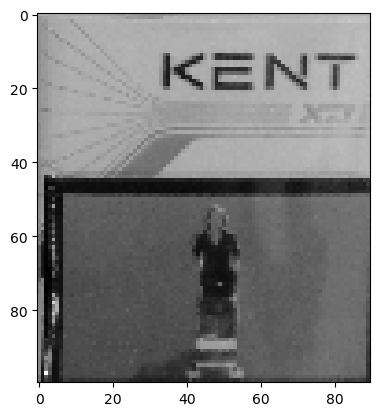

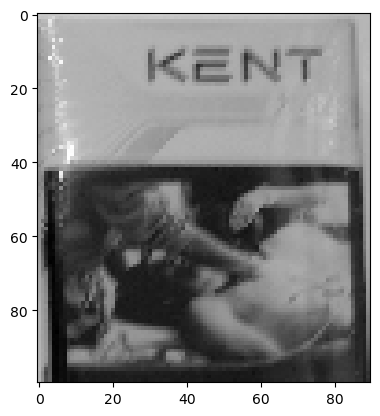

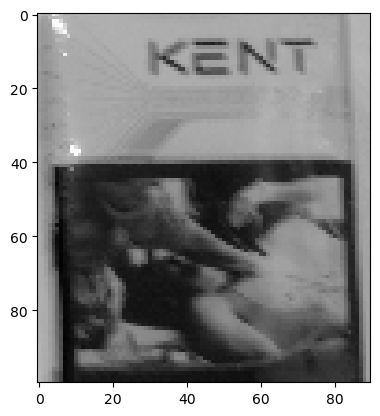

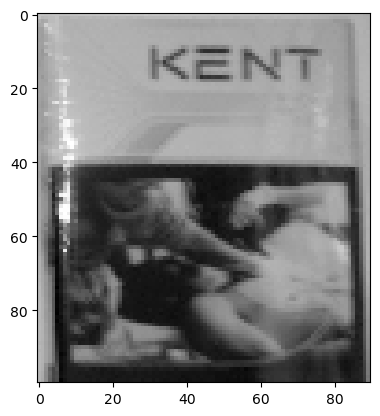

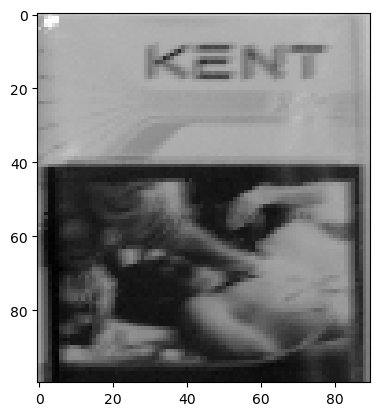

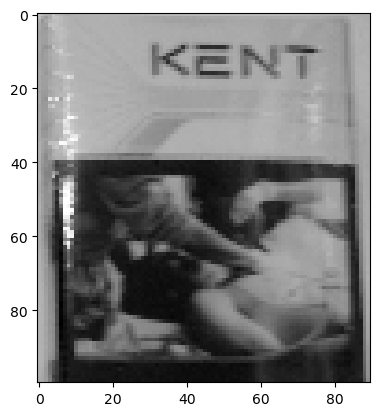

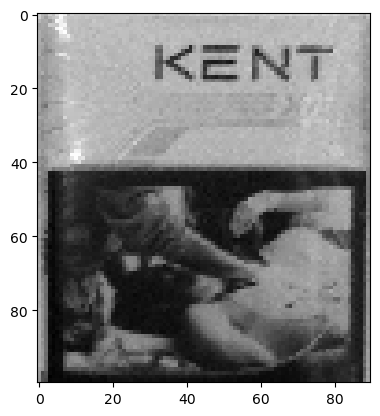

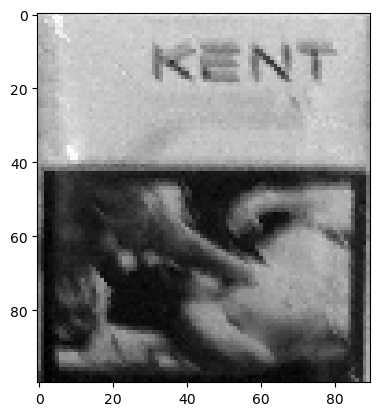

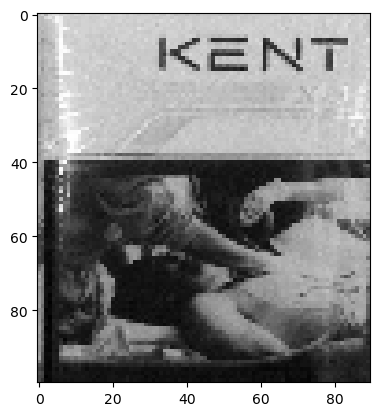

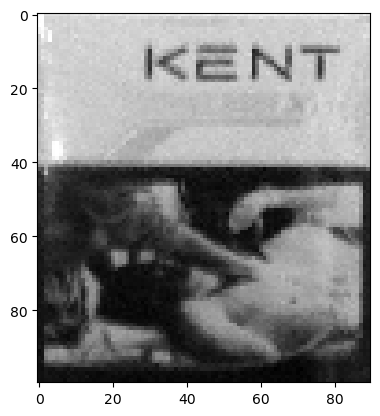

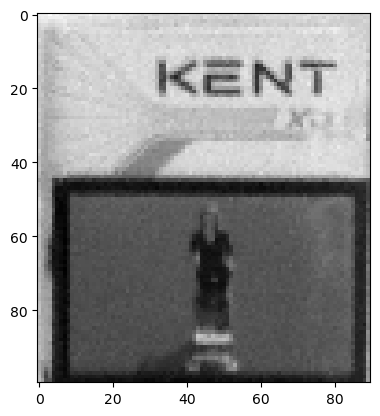

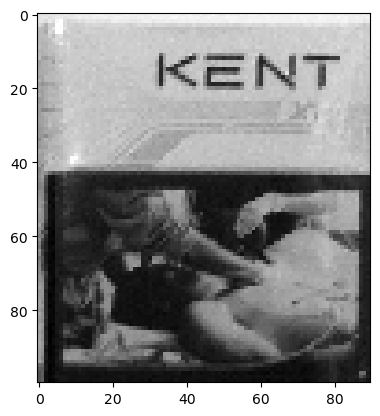

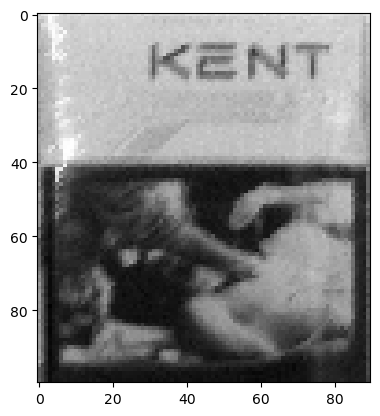

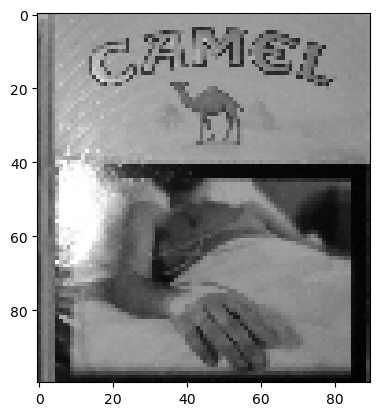

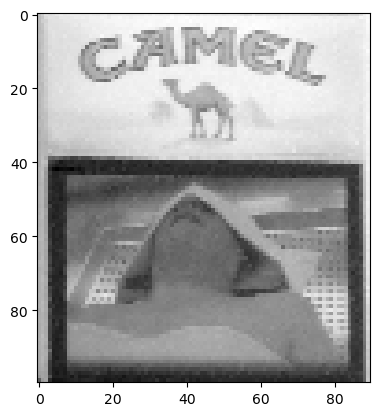

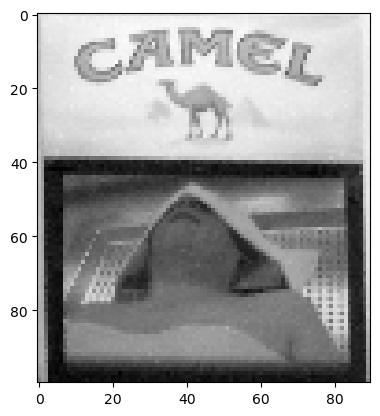

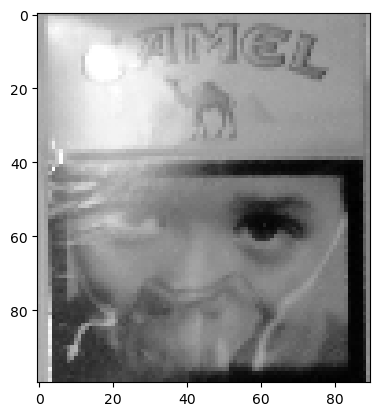

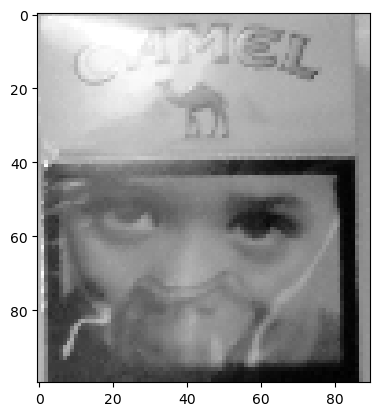

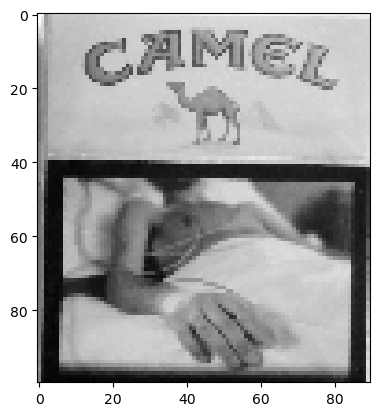

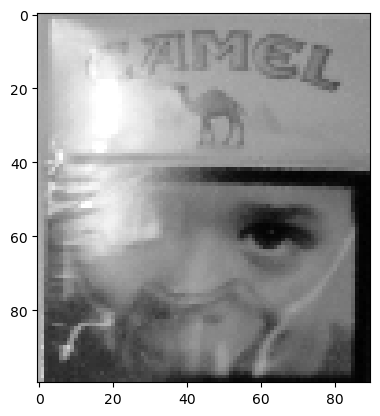

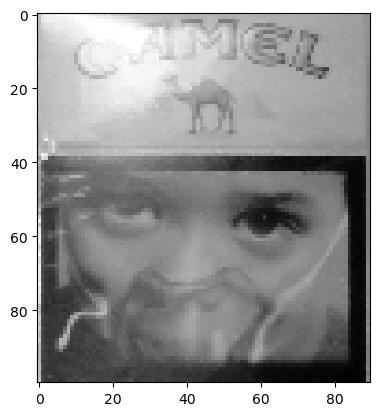

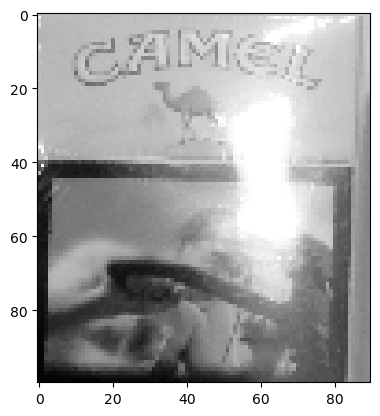

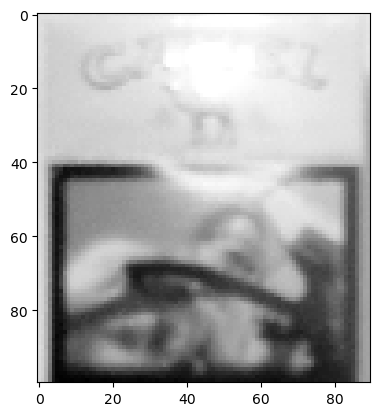

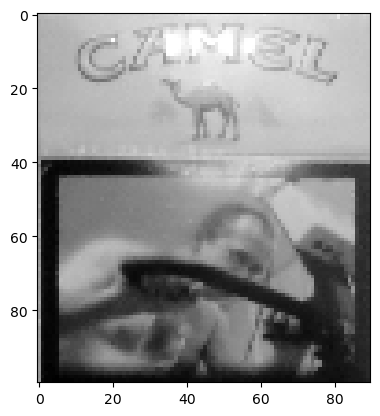

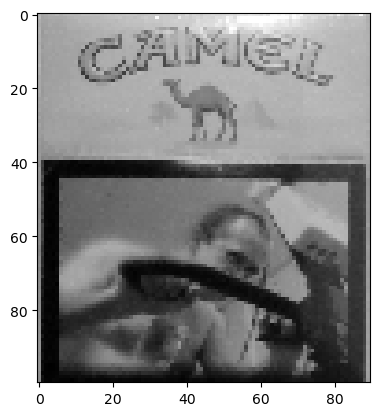

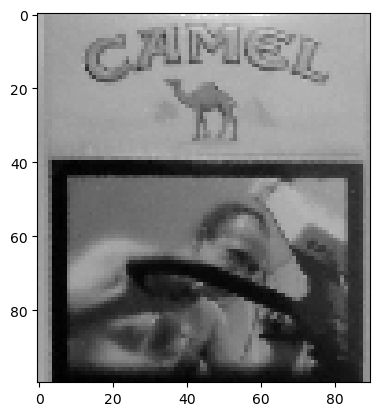

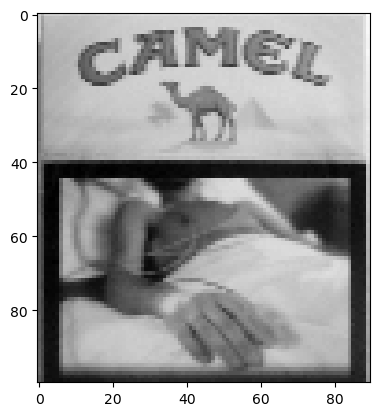

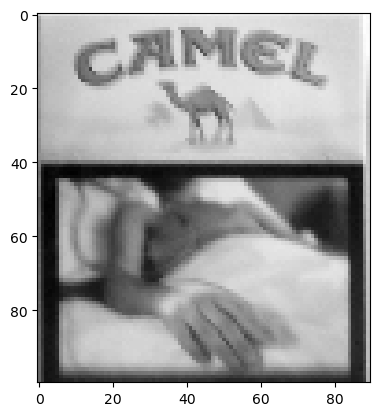

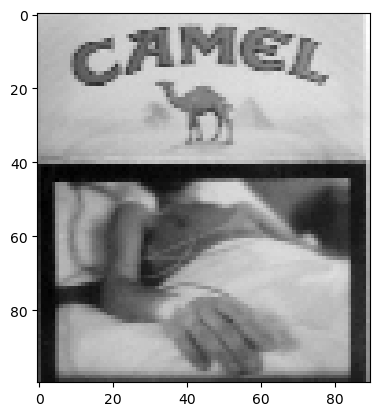

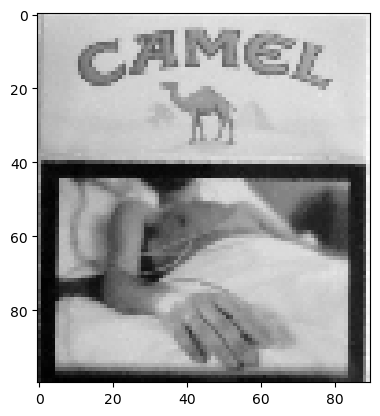

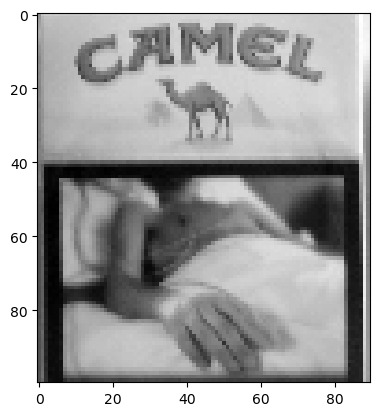

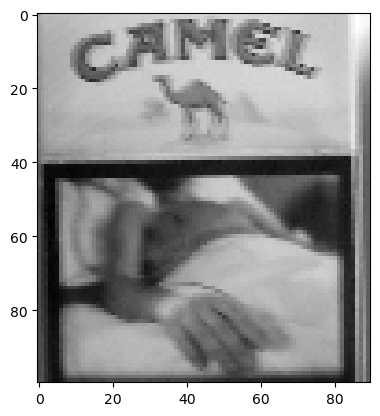

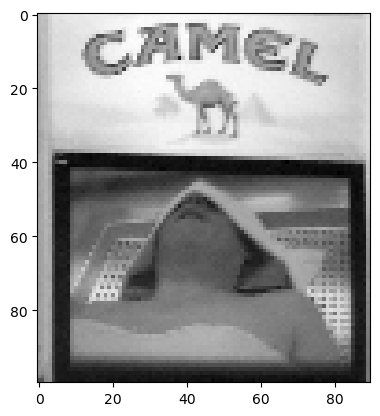

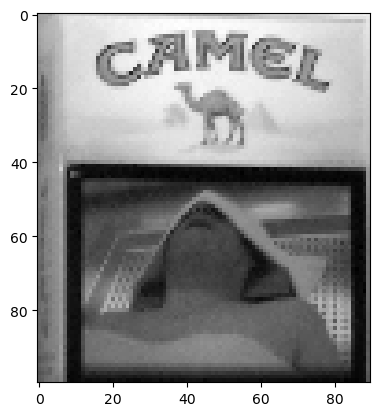

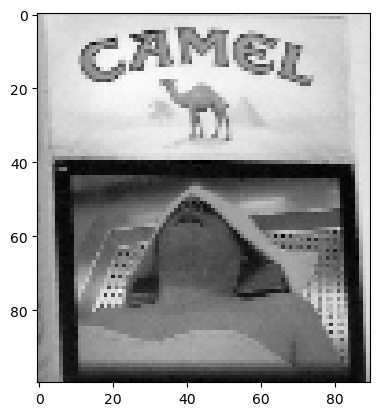

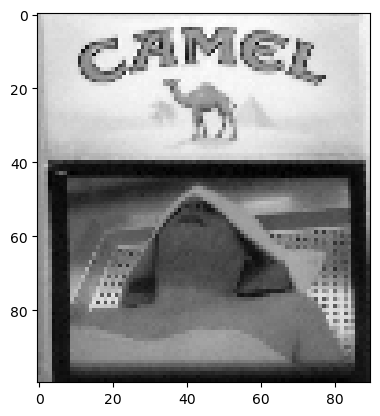

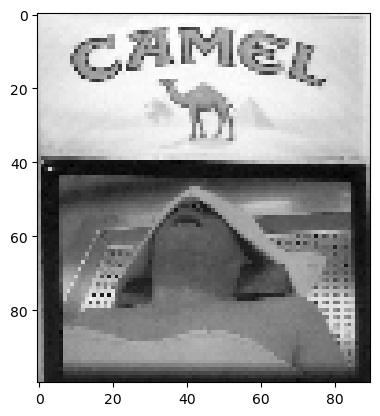

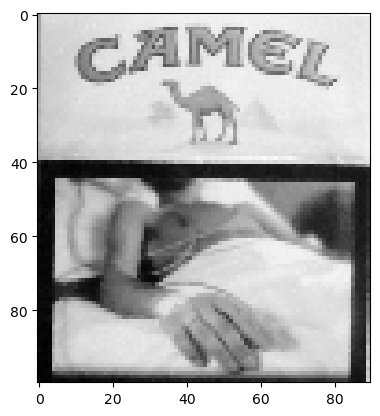

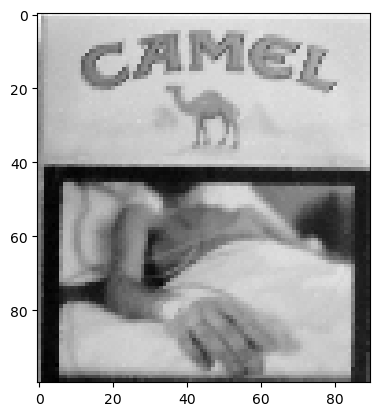

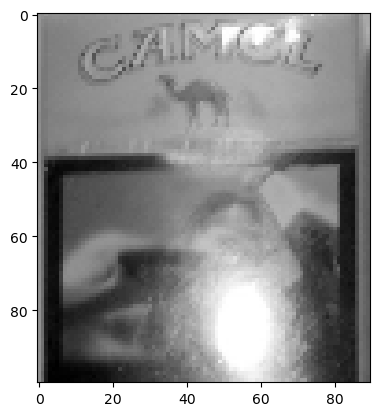

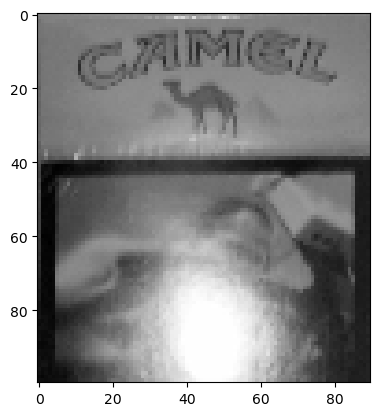

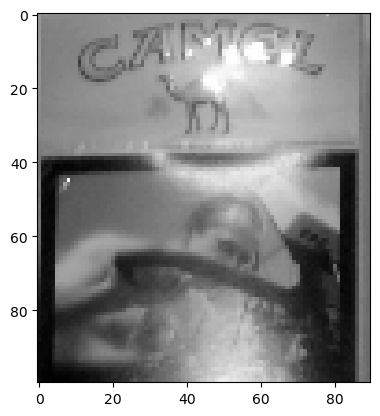

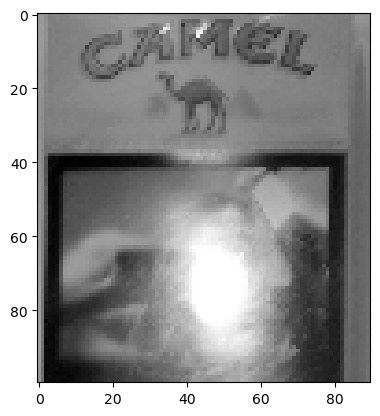

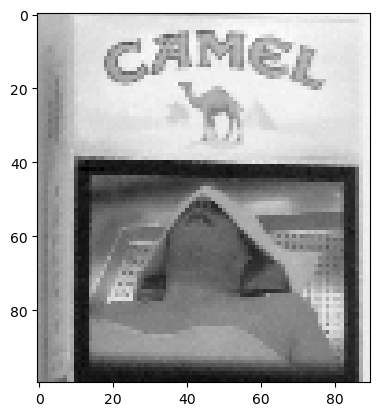

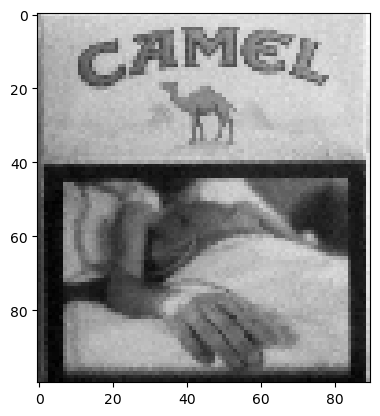

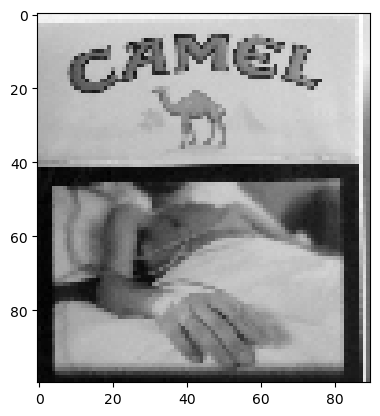

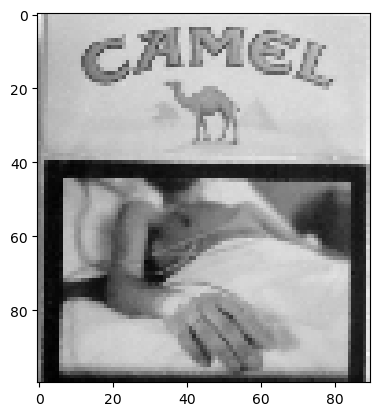

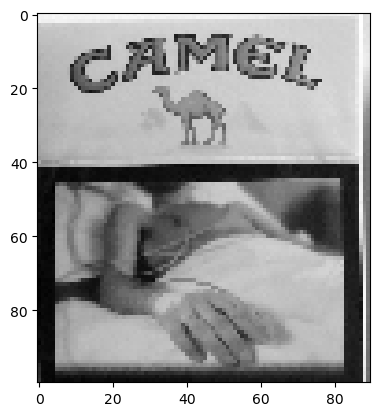

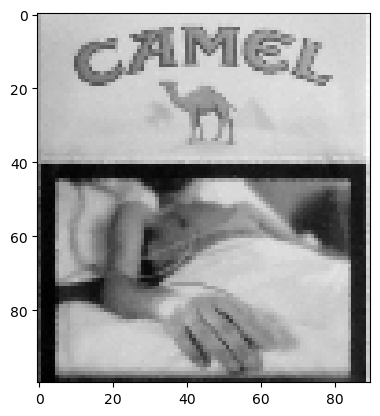

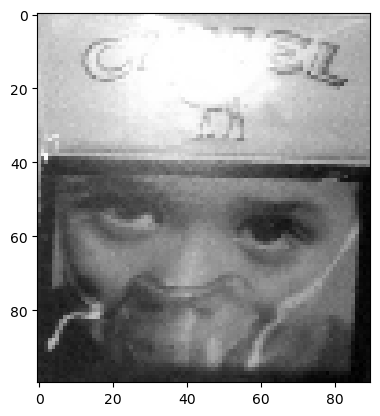

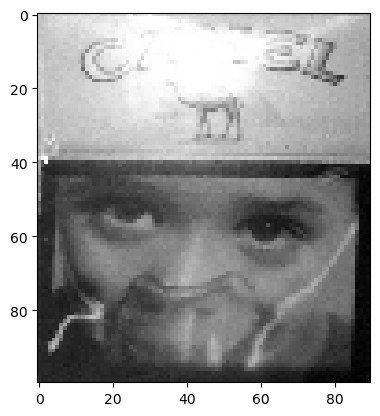

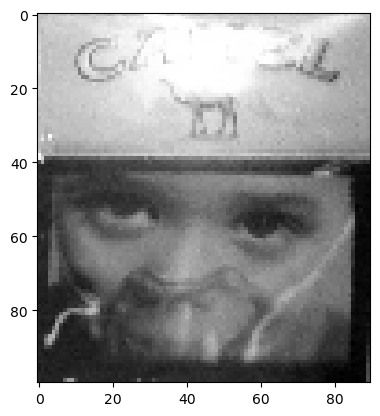

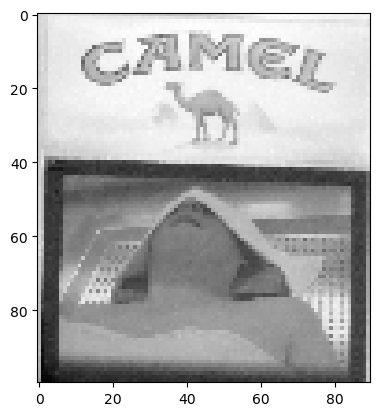

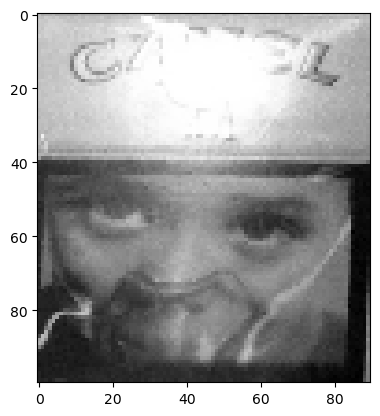

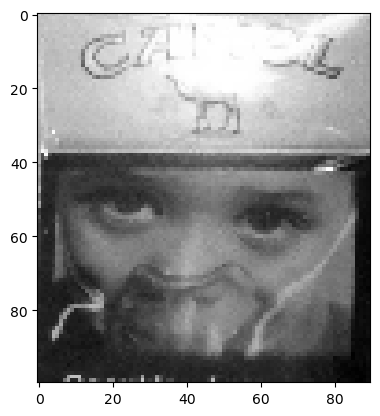

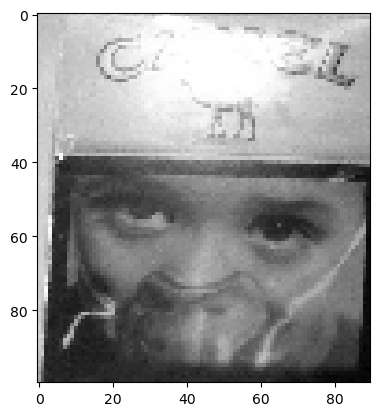

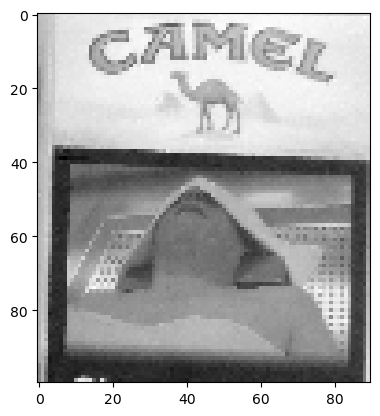

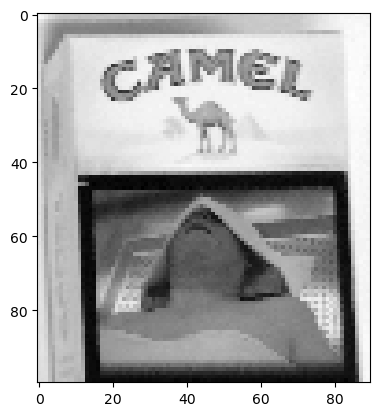

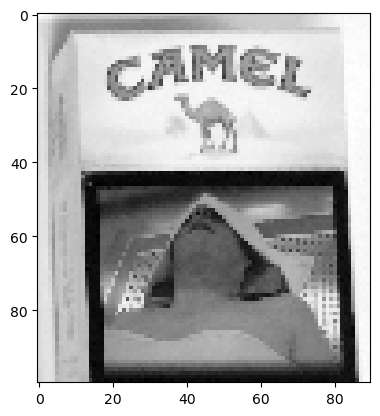

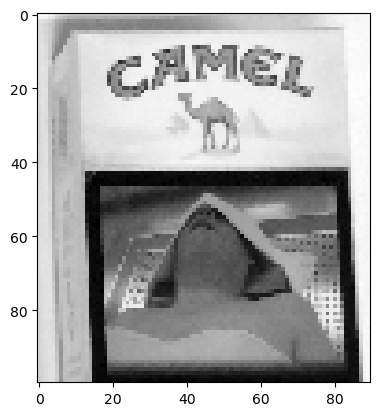

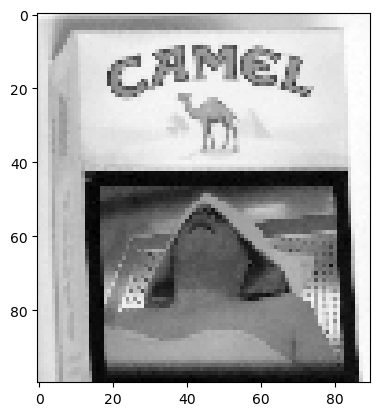

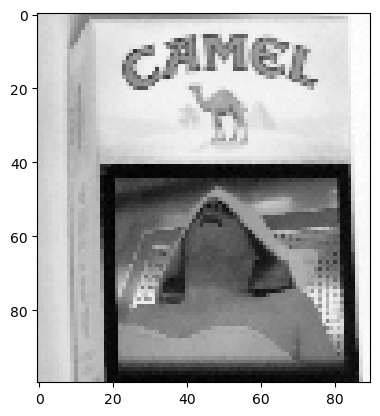

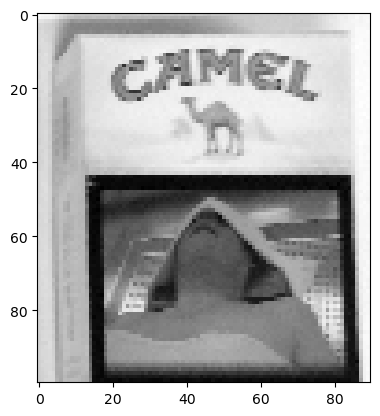

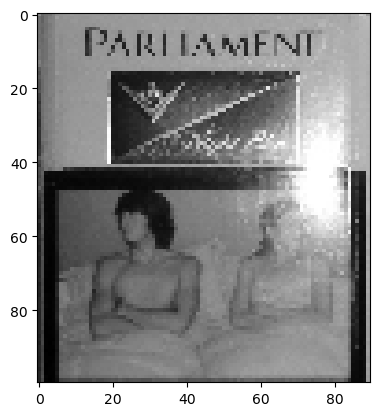

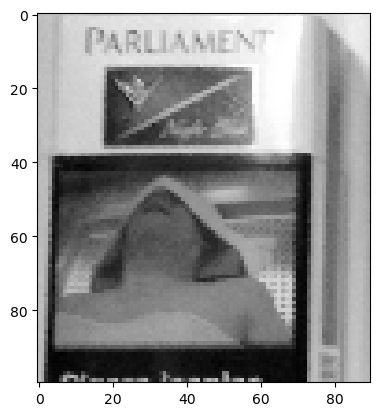

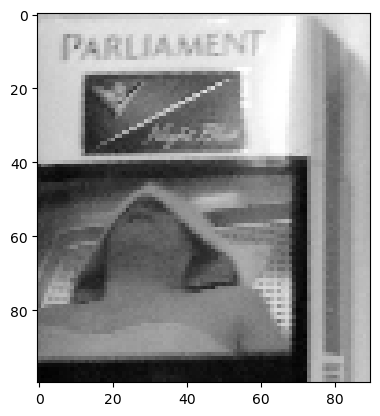

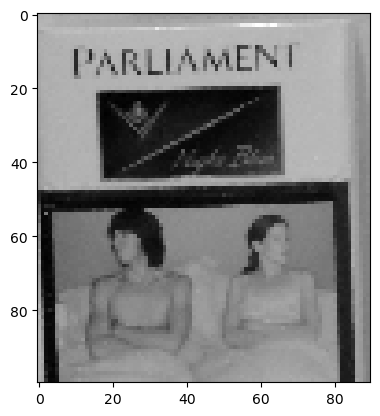

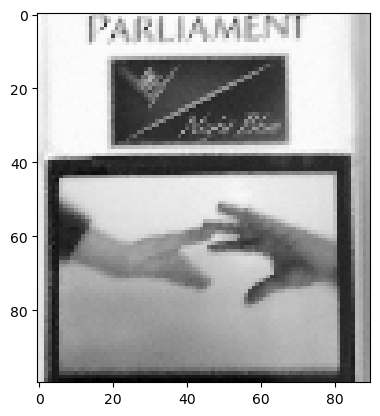

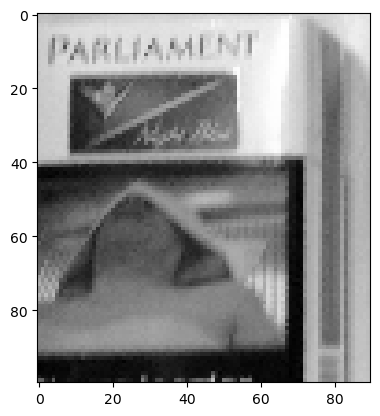

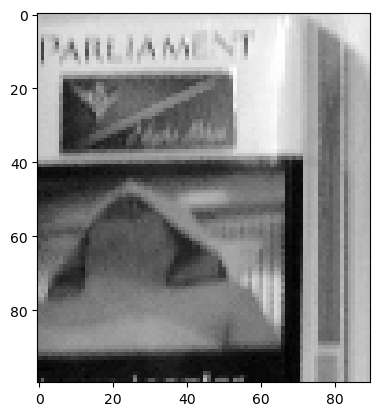

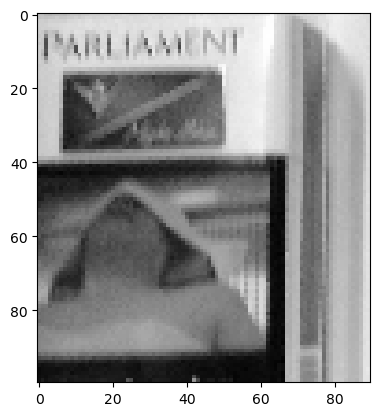

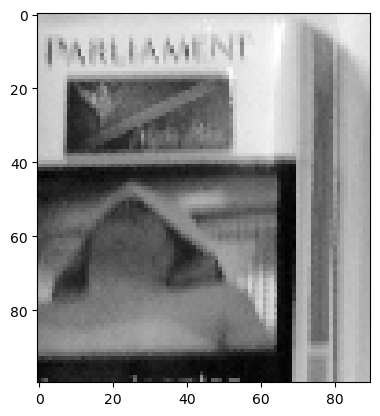

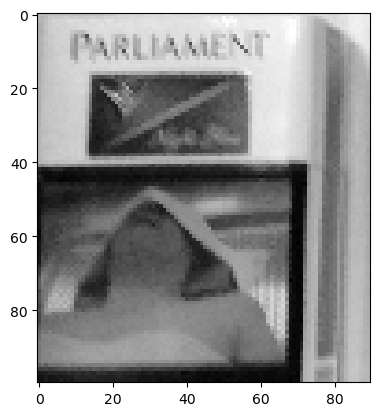

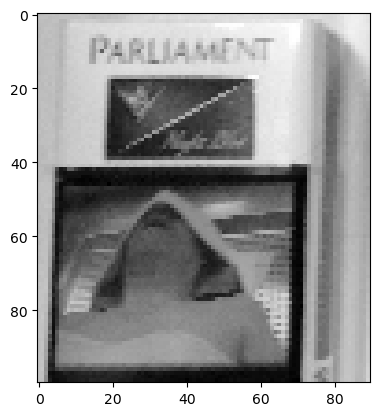

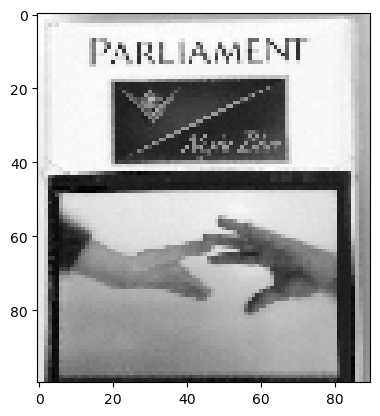

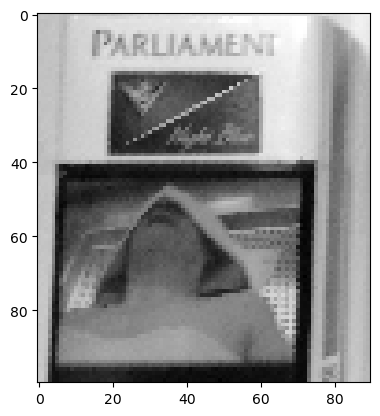

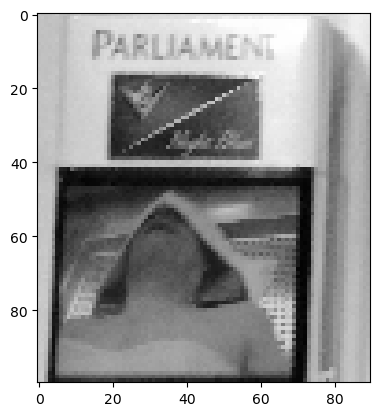

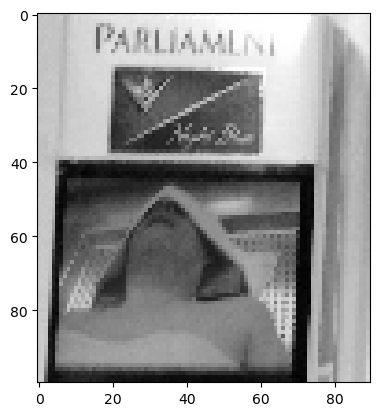

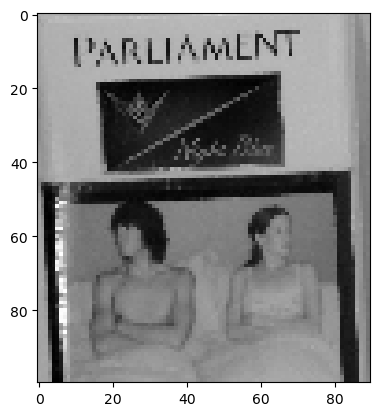

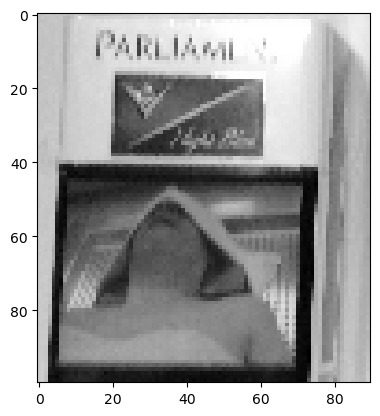

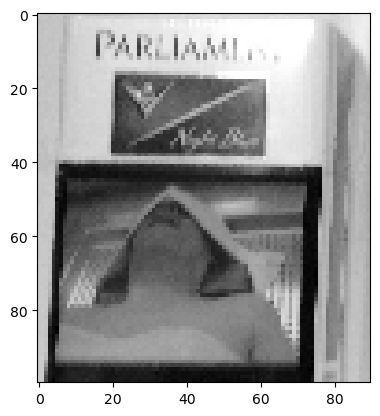

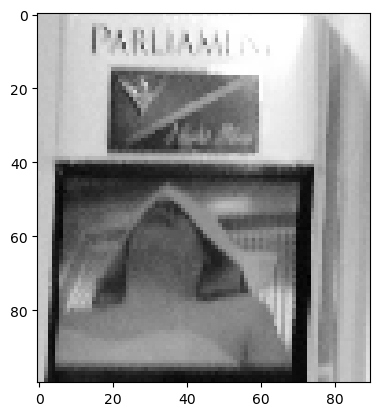

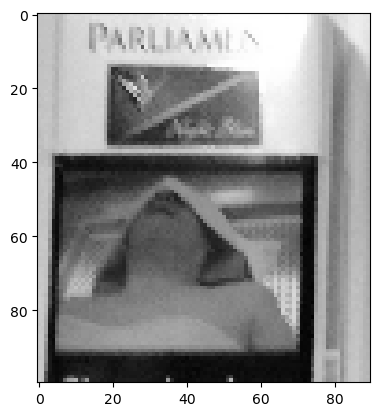

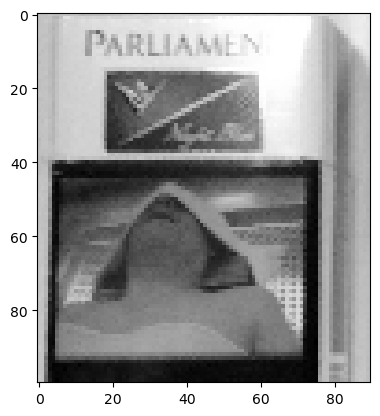

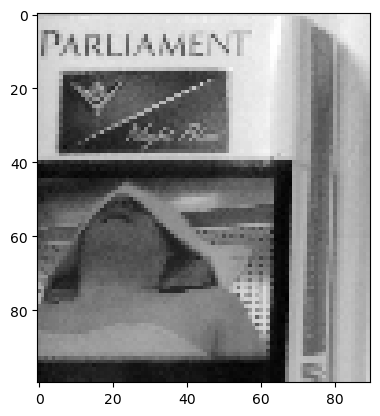

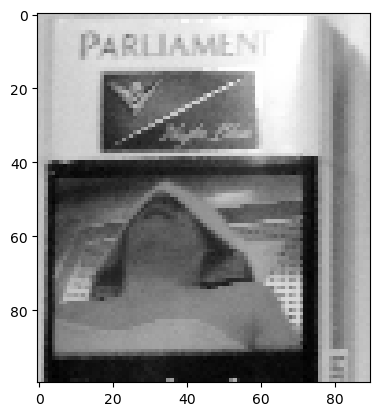

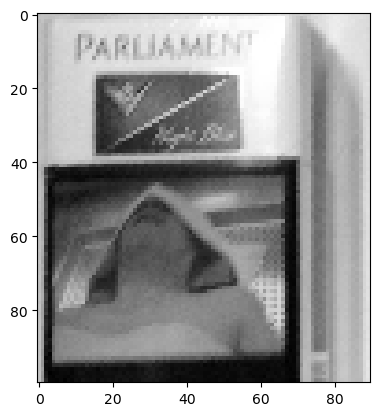

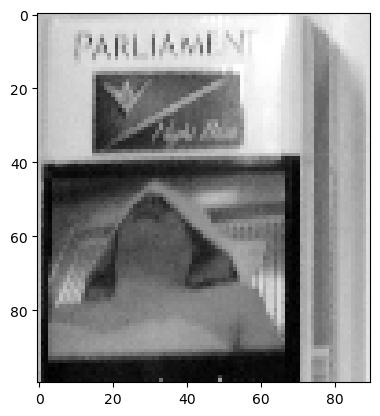

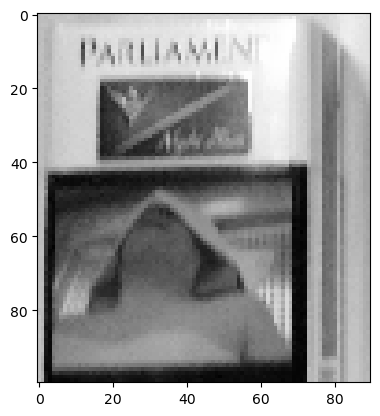

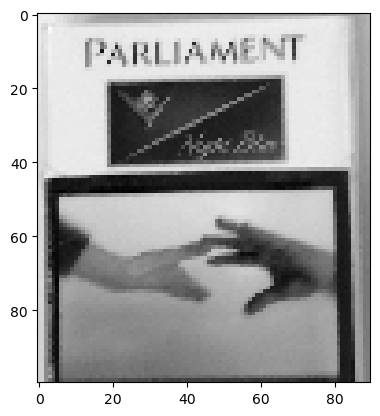

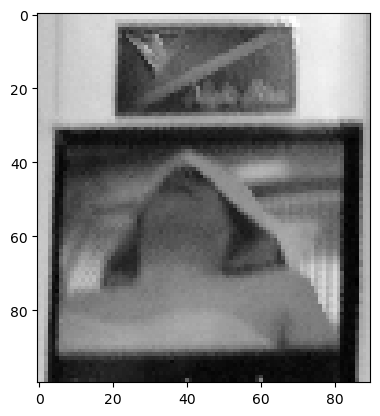

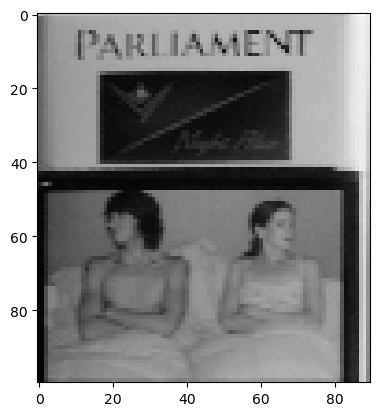

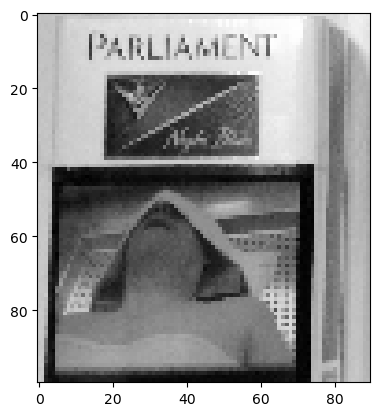

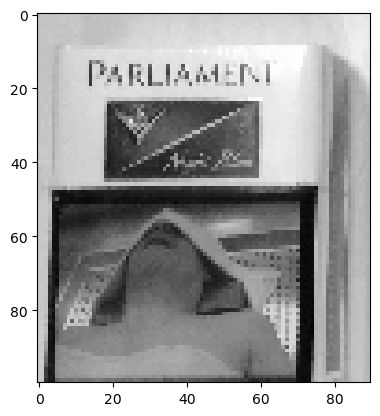

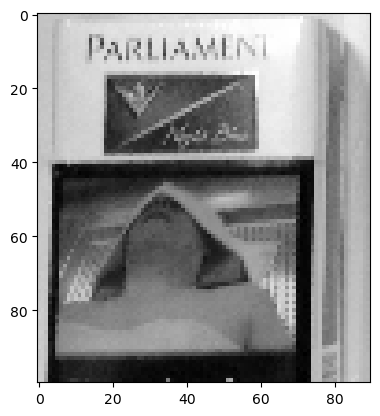

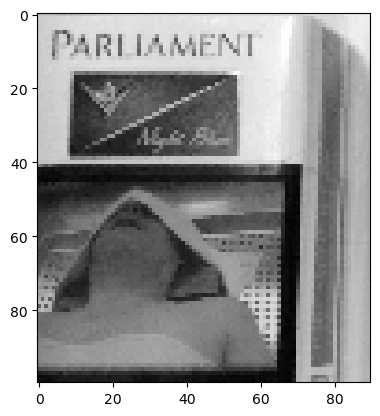

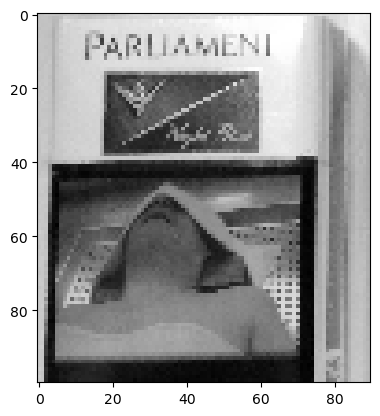

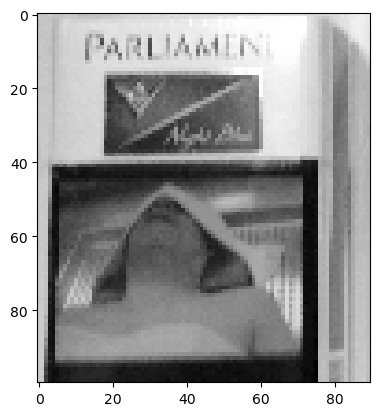

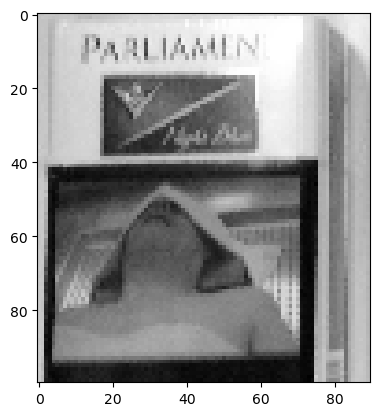

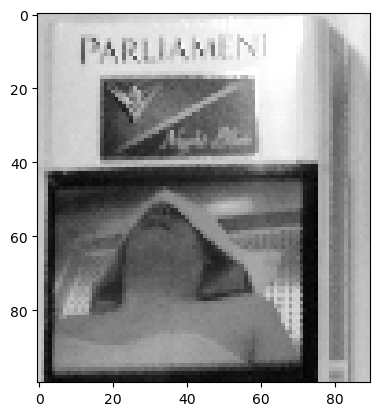

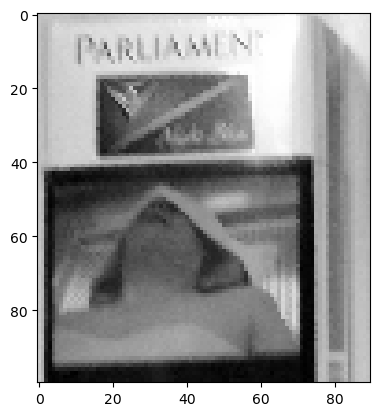

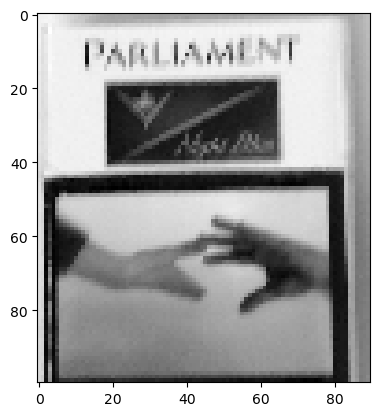

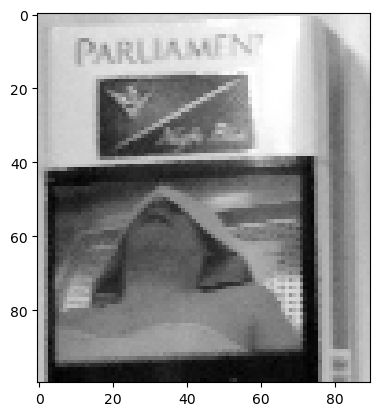

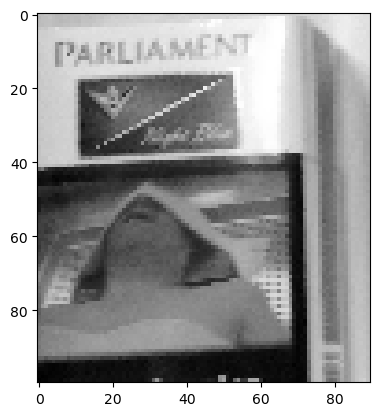

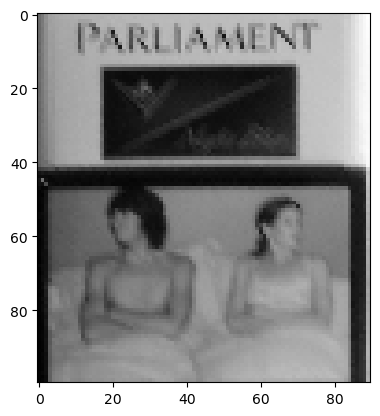

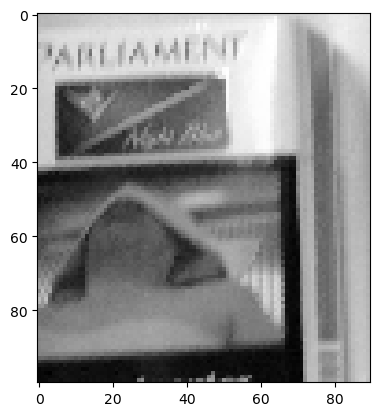

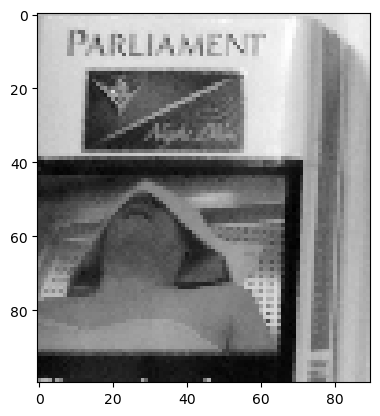

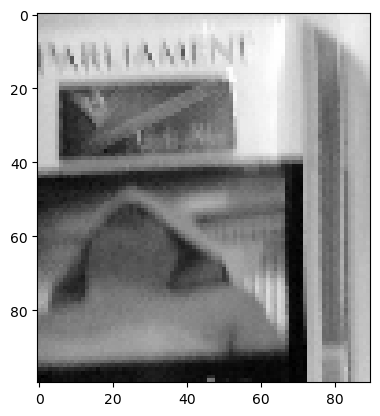

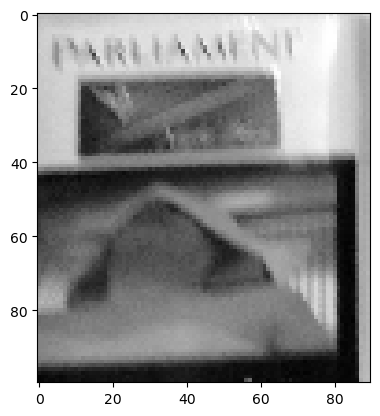

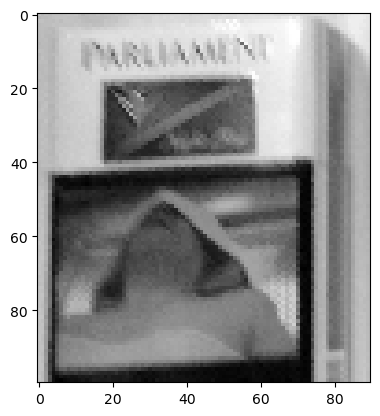

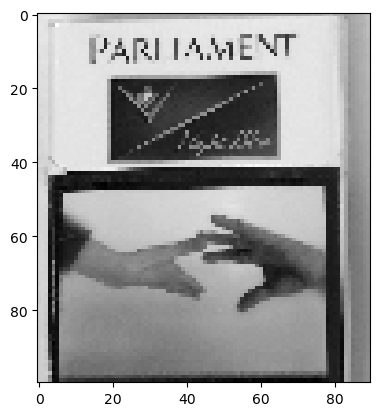

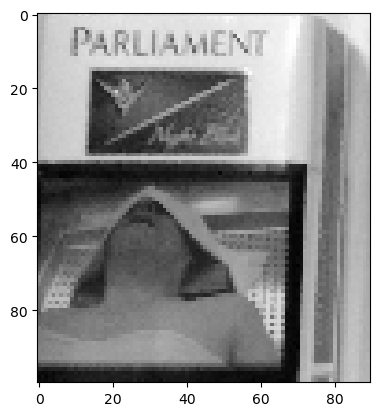

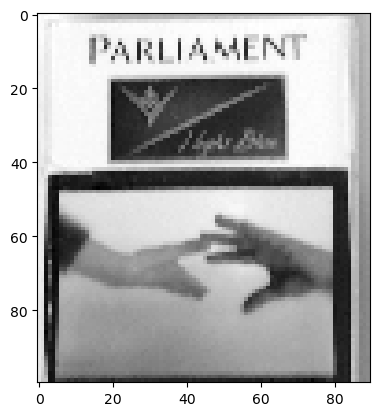

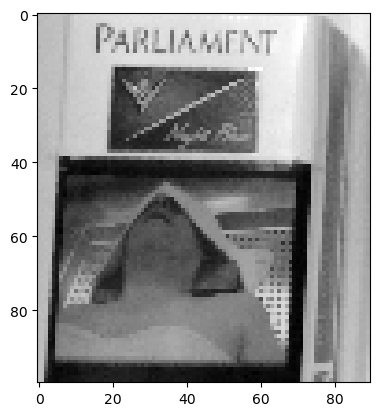

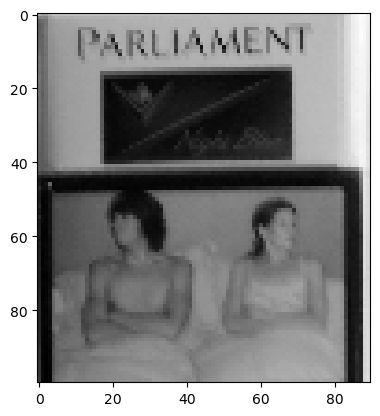

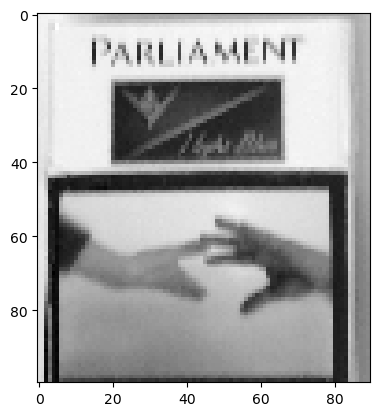

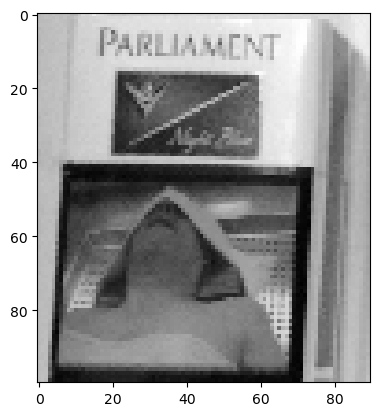

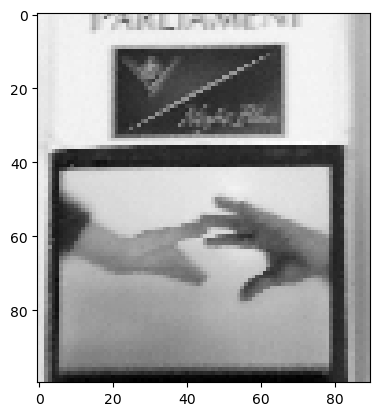

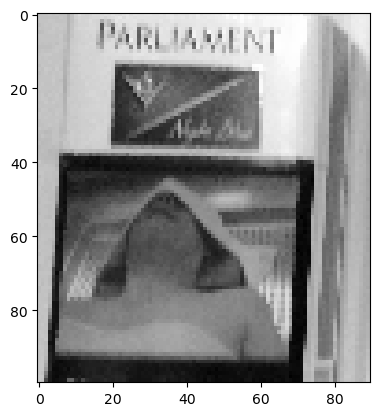

In [17]:
# Storing the Images that belong to cluster 0
first_clust = img_report[img_report.Cluster == 0]

# To get the Images (cluster 0), I use the for loop
for i in first_clust.Id:
    plt.imshow(X_train[i,:], cmap = "gray")
    plt.show()